### 데이터 셋
* train.csv
* test.csv
* submission_example.csv

### 사이트에서 데이터 설명을 보고 싶으나 페이지를 못 찾음...

In [1]:
import pandas as pd     # 데이터 분석, 처리를 위해
import seaborn as sns             # 시각화
import matplotlib.pyplot as plt   # 시각화
import numpy as np      # 기본 배열, 계산

from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기

train = pd.read_csv("./data/Bankruptcy/train.csv")
test = pd.read_csv("./data/Bankruptcy/test.csv")
sub = pd.read_csv("./data/Bankruptcy/submission_example.csv")

train.shape, test.shape, sub.shape

((800, 22), (200, 21), (200, 2))

In [3]:
# 데이터를 살펴보자

train.columns

Index(['id', 'sum', 'term', 'payment', 'guarantees', 'reason', 'credits',
       'other_credits', 'credit_report', 'marital_status', 'age', 'employment',
       'qualification', 'immigrant', 'residence_since', 'accommodation',
       'estate', 'savings', 'dependents', 'phone', 'status', 'bankruptcy'],
      dtype='object')

In [4]:
test.columns

Index(['id', 'sum', 'term', 'payment', 'guarantees', 'reason', 'credits',
       'other_credits', 'credit_report', 'marital_status', 'age', 'employment',
       'qualification', 'immigrant', 'residence_since', 'accommodation',
       'estate', 'savings', 'dependents', 'phone', 'status'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               800 non-null    int64 
 1   sum              800 non-null    int64 
 2   term             800 non-null    int64 
 3   payment          800 non-null    int64 
 4   guarantees       800 non-null    object
 5   reason           800 non-null    object
 6   credits          800 non-null    int64 
 7   other_credits    800 non-null    object
 8   credit_report    800 non-null    object
 9   marital_status   800 non-null    object
 10  age              800 non-null    int64 
 11  employment       800 non-null    object
 12  qualification    800 non-null    object
 13  immigrant        800 non-null    object
 14  residence_since  800 non-null    int64 
 15  accommodation    800 non-null    object
 16  estate           800 non-null    object
 17  savings          800 non-null    ob

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               200 non-null    int64 
 1   sum              200 non-null    int64 
 2   term             200 non-null    int64 
 3   payment          200 non-null    int64 
 4   guarantees       200 non-null    object
 5   reason           200 non-null    object
 6   credits          200 non-null    int64 
 7   other_credits    200 non-null    object
 8   credit_report    200 non-null    object
 9   marital_status   200 non-null    object
 10  age              200 non-null    int64 
 11  employment       200 non-null    object
 12  qualification    200 non-null    object
 13  immigrant        200 non-null    object
 14  residence_since  200 non-null    int64 
 15  accommodation    200 non-null    object
 16  estate           200 non-null    object
 17  savings          200 non-null    ob

* bankruptcy를 예측
* train 데이터는 800개, test 데이터는 200개
* 결측치는 없어서 다 사용할 수 있음

In [7]:
train.head()

,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,...,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
0,0,1169,6,4,none,television or radio,2,none,critical account or other credits existing(not...,male single,...,skilled employee,yes,4,own,real estate,unknown or no savings account,1,yes,less-than 0 cu,0
1,1,5951,48,2,none,television or radio,1,none,existing credits paid back duly till now,female divorced or separated or married,...,skilled employee,yes,2,own,real estate,less-than 100 cu,1,none,0 to 200 cu,1
2,2,2096,12,2,none,education,1,none,critical account or other credits existing(not...,male single,...,unskilled resident,yes,3,own,real estate,less-than 100 cu,2,none,no checking account,0
3,3,7882,42,2,guarantor,furniture or equipment,1,none,existing credits paid back duly till now,male single,...,skilled employee,yes,4,for free,building society savings agreement or life ins...,less-than 100 cu,2,none,less-than 0 cu,0
4,4,4870,24,3,none,new car,2,none,delay in paying off in the past,male single,...,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,less-than 0 cu,1


In [8]:
# 지난 시간에 배운 중간에 생략되는 열과 행 보이도록 하기
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [9]:
train.head()

,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,age,employment,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
0,0,1169,6,4,none,television or radio,2,none,critical account or other credits existing(not...,male single,67,7+ y.,skilled employee,yes,4,own,real estate,unknown or no savings account,1,yes,less-than 0 cu,0
1,1,5951,48,2,none,television or radio,1,none,existing credits paid back duly till now,female divorced or separated or married,22,1 to 4 y.,skilled employee,yes,2,own,real estate,less-than 100 cu,1,none,0 to 200 cu,1
2,2,2096,12,2,none,education,1,none,critical account or other credits existing(not...,male single,49,4 to 7 y.,unskilled resident,yes,3,own,real estate,less-than 100 cu,2,none,no checking account,0
3,3,7882,42,2,guarantor,furniture or equipment,1,none,existing credits paid back duly till now,male single,45,4 to 7 y.,skilled employee,yes,4,for free,building society savings agreement or life ins...,less-than 100 cu,2,none,less-than 0 cu,0
4,4,4870,24,3,none,new car,2,none,delay in paying off in the past,male single,53,1 to 4 y.,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,less-than 0 cu,1


<AxesSubplot:xlabel='credits', ylabel='count'>

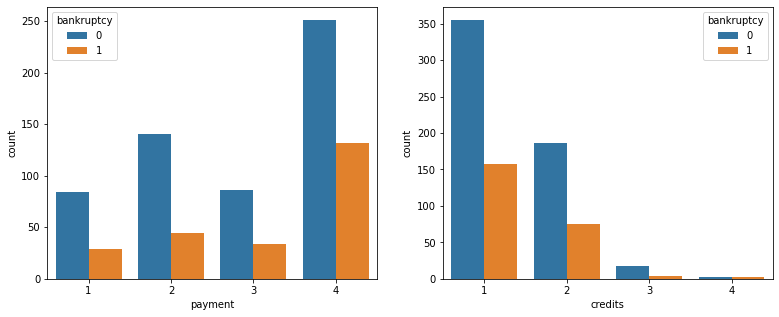

In [24]:
# 데이터 전처리가 필요하겠다
# 일단 숫자 payment와 bankruptcy의 관계를 찍어보자

plt.figure(figsize=(13,5) )
plt.subplot(1,2,1)
sns.countplot(x="payment", hue="bankruptcy",  data=train)

plt.subplot(1,2,2)
sns.countplot(x="credits", hue="bankruptcy",  data=train)

In [25]:
# 그냥 다 넣고 기본 모델 만들기
train.columns

Index(['id', 'sum', 'term', 'payment', 'guarantees', 'reason', 'credits',
       'other_credits', 'credit_report', 'marital_status', 'age', 'employment',
       'qualification', 'immigrant', 'residence_since', 'accommodation',
       'estate', 'savings', 'dependents', 'phone', 'status', 'bankruptcy'],
      dtype='object')

In [26]:
sel = ['sum', 'term', 'payment', 'credits', 'age', 'residence_since', 'dependents']

X = train[sel]
y = train['bankruptcy']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state = 0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
print("학습용 정확도 : ", model_KNN.score(X_train, y_train))
print("테스트용 정확도 : ", model_KNN.score(X_test, y_test))

model_Tree = DecisionTreeClassifier(max_depth=2, random_state=0) #임의값
model_Tree.fit(X_train, y_train)
print("학습용 정확도 : ", model_Tree.score(X_train, y_train))
print("테스트용 정확도 : ", model_Tree.score(X_test, y_test))

model_ENS = RandomForestClassifier(n_estimators=3, random_state=0) #임의값
model_ENS.fit(X_train, y_train)
print("학습용 정확도 : ", model_ENS.score(X_train, y_train))
print("테스트용 정확도 : ", model_ENS.score(X_test, y_test))

학습용 정확도 :  0.75
테스트용 정확도 :  0.6583333333333333
학습용 정확도 :  0.7125
테스트용 정확도 :  0.7
학습용 정확도 :  0.9375
테스트용 정확도 :  0.6333333333333333


In [31]:
# 의사결정트리 복잡도 변경
for i in range(1,7,1):
    model_Tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    model_Tree.fit(X_train, y_train)
    print(f"max_depth : {i}")
    print("훈련 세트 정확도 : {:.3f}".format(model_Tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model_Tree.score(X_test, y_test)))

max_depth : 1
훈련 세트 정확도 : 0.702
테스트 세트 정확도 : 0.700
max_depth : 2
훈련 세트 정확도 : 0.713
테스트 세트 정확도 : 0.700
max_depth : 3
훈련 세트 정확도 : 0.743
테스트 세트 정확도 : 0.671
max_depth : 4
훈련 세트 정확도 : 0.762
테스트 세트 정확도 : 0.679
max_depth : 5
훈련 세트 정확도 : 0.777
테스트 세트 정확도 : 0.708
max_depth : 6
훈련 세트 정확도 : 0.820
테스트 세트 정확도 : 0.667


In [32]:
model_Tree = DecisionTreeClassifier(max_depth=5, random_state=0)
model_Tree.fit(X_train, y_train)
print("학습용 정확도 : ", model_Tree.score(X_train, y_train))
print("테스트용 정확도 : ", model_Tree.score(X_test, y_test))

학습용 정확도 :  0.7767857142857143
테스트용 정확도 :  0.7083333333333334


In [33]:
# 의사결정트리 복잡도 변경
for i in range(1,10,1):
    model_ENS = RandomForestClassifier(n_estimators=i, random_state=0)
    model_ENS.fit(X_train, y_train)
    print(f"max_depth : {i}")
    print("훈련 세트 정확도 : {:.3f}".format(model_ENS.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model_ENS.score(X_test, y_test)))

max_depth : 1
훈련 세트 정확도 : 0.864
테스트 세트 정확도 : 0.592
max_depth : 2
훈련 세트 정확도 : 0.871
테스트 세트 정확도 : 0.642
max_depth : 3
훈련 세트 정확도 : 0.938
테스트 세트 정확도 : 0.633
max_depth : 4
훈련 세트 정확도 : 0.914
테스트 세트 정확도 : 0.662
max_depth : 5
훈련 세트 정확도 : 0.954
테스트 세트 정확도 : 0.667
max_depth : 6
훈련 세트 정확도 : 0.952
테스트 세트 정확도 : 0.721
max_depth : 7
훈련 세트 정확도 : 0.973
테스트 세트 정확도 : 0.696
max_depth : 8
훈련 세트 정확도 : 0.968
테스트 세트 정확도 : 0.713
max_depth : 9
훈련 세트 정확도 : 0.984
테스트 세트 정확도 : 0.704


In [34]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
print("학습용 정확도 : ", model_KNN.score(X_train, y_train))
print("테스트용 정확도 : ", model_KNN.score(X_test, y_test))

model_Tree = DecisionTreeClassifier(max_depth=5, random_state=0)
model_Tree.fit(X_train, y_train)
print("학습용 정확도 : ", model_Tree.score(X_train, y_train))
print("테스트용 정확도 : ", model_Tree.score(X_test, y_test))

model_ENS = RandomForestClassifier(n_estimators=6, random_state=0)
model_ENS.fit(X_train, y_train)
print("학습용 정확도 : ", model_ENS.score(X_train, y_train))
print("테스트용 정확도 : ", model_ENS.score(X_test, y_test))

학습용 정확도 :  0.75
테스트용 정확도 :  0.6583333333333333
학습용 정확도 :  0.7767857142857143
테스트용 정확도 :  0.7083333333333334
학습용 정확도 :  0.9517857142857142
테스트용 정확도 :  0.7208333333333333


In [37]:
model_Tree = DecisionTreeClassifier(max_depth=5, random_state=0)
model_Tree.fit(X_train, y_train)
print("학습용 정확도 : ", model_Tree.score(X_train, y_train))
print("테스트용 정확도 : ", model_Tree.score(X_test, y_test))

학습용 정확도 :  0.7767857142857143
테스트용 정확도 :  0.7083333333333334


* 사이트를 몰라 제출 못 함...
* 데이터 전처리, 데이터 변경, 인코딩
* 확률 예측 predict_proba() 예측해보기